**Project Milestone 2**

In [2]:
# Loading the necessary packages for cleaning and formatting of the flat file data source. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading in flat file data set from excel and presenting the top 10 rows. 

df_flat_file = pd.read_excel('Consolidated Dataset_v2.xlsx')
df_flat_file.head(10)

,SYS ID,CompanyCode,zzk_CertificateNum,Claim Created,Claim Paid,Claim Amount,Claim Category,EnrollmentDate,DateMoneyFirstApplied,PropertyAddress,...,WarrantyState,PropertyZipCode,County,Latitude,Longitude,WarrantyType,zzc_AmountPaid,WarrantyYears,zzc_BuilderName,zzc_BuilderNumber
0,93883,1,975012,NaT,NaT,NaN,NaN,2004-04-17 00:00:00,2019-05-29,3 Redwood Trace Lane,...,FL,34472,Marion,29.18,-82.13,BB-W8010,227.50,10.0,Weitlund Construction LLC,16010
1,83401,5,946012,NaT,NaT,NaN,NaN,2006-06-28 00:00:00,2018-07-13,113 Harley Meadows Circle,...,TX,76084,Johnson,32.42,-97.10,BB-W8620TX,703.25,10.0,"Jonathan Mark Homes, Inc.",1248
2,25811,5,882386,NaT,NaT,NaN,NaN,2008-04-14 00:00:00,2016-10-06,8330 Cape Royal Drive,...,TX,77433,Harris,29.96,-95.69,BB-W8000TX,586.50,10.0,"Westin Homes and Properties, LP",11025
3,58716,11,889180,NaT,NaT,NaN,NaN,2010-05-23 00:00:00,2017-05-01,5111 Moreland Street,...,VA,23435,Suffolk City,36.70,-76.63,RRG8000,367.50,10.0,Terry Peterson Residential,9812
4,21512,5,867264,NaT,NaT,NaN,NaN,2010-09-30 00:00:00,2016-05-17,27406 Canyon Reach Drive,...,TX,77494,Fort Bend,29.79,-95.82,BB-W8000TX,766.70,10.0,"Westin Homes and Properties, LP",11025
5,51120,5,889286,NaT,NaT,NaN,NaN,2010-12-22 00:00:00,2017-04-28,15111 Edna Lane,...,TX,75035,Collin,33.14,-96.81,BB-W8000TX,719.82,10.0,"Shaddock Homes, Ltd.",9164
6,70110,1,750597,NaT,NaT,NaN,NaN,2012-02-16 00:00:00,2018-12-10,14834 Man O' War Drive,...,FL,33556,Hillsborough,28.20,-82.59,BB-W8020,292.95,10.0,"Shimberg Homes, LLC",7606
7,58847,11,889227,NaT,NaT,NaN,NaN,2012-06-12 00:00:00,2017-07-27,5109 Moreland Drive,...,VA,23435,Suffolk City,36.70,-76.63,RRG8000,334.50,10.0,Terry Peterson Residential,9812
8,2965,1,850108,NaT,NaT,NaN,NaN,2012-12-19 00:00:00,2016-01-29,1361 Congressional Court,...,FL,32708,Seminole,28.68,-81.27,BB-W8000,357.70,10.0,"TGD Orlando, LLC",13049
9,65883,1,774344,NaT,NaT,NaN,NaN,2012-12-21 00:00:00,2018-06-25,4096 Stone Creek Loop,...,FL,33859,Polk,27.90,-81.58,BB-W8010,325.29,10.0,"Mastercraft Homes, LLC",2034


The data set represents policies sold on our structural warranty business for the years 2004 - 2020. 

In [4]:
# Step 1.  Checking for any duplicates within the dataframe.  A repeated certificate number could mean a source 
#          system issue with policy number genereation, we should not have any repeated certificate numbers. 

print(f'Repeated Certificate Numbers: {any(df_flat_file.duplicated())}')

Repeated Certificate Numbers: False


In [5]:
# Step 2.  Viewing the column headers from the read in, I would like to replace/rename for a better 
#          understanding to the audience.

list(df_flat_file.columns)

['SYS ID',
 'CompanyCode',
 'zzk_CertificateNum',
 'Claim Created ',
 'Claim Paid',
 'Claim Amount',
 'Claim Category',
 'EnrollmentDate',
 'DateMoneyFirstApplied',
 'PropertyAddress',
 'PropertyCity',
 'WarrantyState',
 'PropertyZipCode',
 'County',
 'Latitude',
 'Longitude',
 'WarrantyType',
 'zzc_AmountPaid',
 'WarrantyYears',
 'zzc_BuilderName',
 'zzc_BuilderNumber']

In [6]:
df_flat_file.columns = ['Source System ID', 'Company Code', 'Certificate Number', 'Claim Created Date', 'Claim Paid Date', 
                       'Claim Amount Paid', 'Claim Category', 'Enrollment Date', 'Date Money First Applied',
                       'Property Address', 'Property City', 'Property State', 'Property Zip Code', 'Property County',
                       'Property Latitude', 'Property Longitude', 'Warranty Type', 'Warranty Price Paid',
                       'Amount of Warranty Coverage Years', 'Property Builder Name', 'Property Builder Number']
df_flat_file.head(10)

,Source System ID,Company Code,Certificate Number,Claim Created Date,Claim Paid Date,Claim Amount Paid,Claim Category,Enrollment Date,Date Money First Applied,Property Address,...,Property State,Property Zip Code,Property County,Property Latitude,Property Longitude,Warranty Type,Warranty Price Paid,Amount of Warranty Coverage Years,Property Builder Name,Property Builder Number
0,93883,1,975012,NaT,NaT,NaN,NaN,2004-04-17 00:00:00,2019-05-29,3 Redwood Trace Lane,...,FL,34472,Marion,29.18,-82.13,BB-W8010,227.50,10.0,Weitlund Construction LLC,16010
1,83401,5,946012,NaT,NaT,NaN,NaN,2006-06-28 00:00:00,2018-07-13,113 Harley Meadows Circle,...,TX,76084,Johnson,32.42,-97.10,BB-W8620TX,703.25,10.0,"Jonathan Mark Homes, Inc.",1248
2,25811,5,882386,NaT,NaT,NaN,NaN,2008-04-14 00:00:00,2016-10-06,8330 Cape Royal Drive,...,TX,77433,Harris,29.96,-95.69,BB-W8000TX,586.50,10.0,"Westin Homes and Properties, LP",11025
3,58716,11,889180,NaT,NaT,NaN,NaN,2010-05-23 00:00:00,2017-05-01,5111 Moreland Street,...,VA,23435,Suffolk City,36.70,-76.63,RRG8000,367.50,10.0,Terry Peterson Residential,9812
4,21512,5,867264,NaT,NaT,NaN,NaN,2010-09-30 00:00:00,2016-05-17,27406 Canyon Reach Drive,...,TX,77494,Fort Bend,29.79,-95.82,BB-W8000TX,766.70,10.0,"Westin Homes and Properties, LP",11025
5,51120,5,889286,NaT,NaT,NaN,NaN,2010-12-22 00:00:00,2017-04-28,15111 Edna Lane,...,TX,75035,Collin,33.14,-96.81,BB-W8000TX,719.82,10.0,"Shaddock Homes, Ltd.",9164
6,70110,1,750597,NaT,NaT,NaN,NaN,2012-02-16 00:00:00,2018-12-10,14834 Man O' War Drive,...,FL,33556,Hillsborough,28.20,-82.59,BB-W8020,292.95,10.0,"Shimberg Homes, LLC",7606
7,58847,11,889227,NaT,NaT,NaN,NaN,2012-06-12 00:00:00,2017-07-27,5109 Moreland Drive,...,VA,23435,Suffolk City,36.70,-76.63,RRG8000,334.50,10.0,Terry Peterson Residential,9812
8,2965,1,850108,NaT,NaT,NaN,NaN,2012-12-19 00:00:00,2016-01-29,1361 Congressional Court,...,FL,32708,Seminole,28.68,-81.27,BB-W8000,357.70,10.0,"TGD Orlando, LLC",13049
9,65883,1,774344,NaT,NaT,NaN,NaN,2012-12-21 00:00:00,2018-06-25,4096 Stone Creek Loop,...,FL,33859,Polk,27.90,-81.58,BB-W8010,325.29,10.0,"Mastercraft Homes, LLC",2034


In [7]:
# Step 3.  Keeping columns relevant to the study, those needed shown below. 

df_flat = df_flat_file[['Property State','Certificate Number', 'Warranty Price Paid', 'Claim Amount Paid']]
df_flat

,Property State,Certificate Number,Warranty Price Paid,Claim Amount Paid
0,FL,975012,227.50,NaN
1,TX,946012,703.25,NaN
2,TX,882386,586.50,NaN
3,VA,889180,367.50,NaN
4,TX,867264,766.70,NaN
...,...,...,...,...
145095,TX,1034880,311.50,NaN
145096,SC,955403,175.00,NaN
145097,TX,974362,238.70,NaN
145098,AL,973258,NaN,NaN


In [8]:
#  Step 4. Checking fop NaN in the Property State column.

df_flat['Property State'].isnull().values.any()

False

In [9]:
#  Checking for NaN in the Warranty Price Paid column. 

df_flat['Warranty Price Paid'].isnull().values.any()

True

In [10]:
# Step 5.  Dropping the NaN from the Warranty Price Paid column since this data is incomplete.  You can see
#          that a total of 49 policies were removed.

df_flat.dropna(subset=['Warranty Price Paid'])

,Property State,Certificate Number,Warranty Price Paid,Claim Amount Paid
0,FL,975012,227.50,NaN
1,TX,946012,703.25,NaN
2,TX,882386,586.50,NaN
3,VA,889180,367.50,NaN
4,TX,867264,766.70,NaN
...,...,...,...,...
145093,TX,1034598,2000.00,NaN
145094,TX,1034593,818.18,NaN
145095,TX,1034880,311.50,NaN
145096,SC,955403,175.00,NaN


In [11]:
# Step 6.  Summarizing the dataset so that each state is reprensted by using the groupby function.  I also
#          added a column to count the number of certificates sold per state.

df_flat = df_flat.groupby('Property State').agg({'Warranty Price Paid': 'sum', 'Claim Amount Paid': 'sum',
                                                 'Certificate Number': 'count'})
df_flat

,Warranty Price Paid,Claim Amount Paid,Certificate Number
Property State,,,
AL,9.394450e+05,7194.69,3398
AR,2.799705e+05,6914.07,413
AZ,3.100359e+05,0.00,1813
CA,1.299673e+06,3927.60,5550
CO,9.289688e+05,16824.95,1016
DE,5.716867e+04,0.00,114
FL,1.246984e+07,63382.10,44876
GA,1.579587e+06,25218.61,4596
ID,6.134200e+03,0.00,11


In [12]:
# Step 7.  Added a new column for Average Warranty Sold by dividing the number of certificates sold by the
#          sum of the warranty price paid.

df_flat_final = df_flat.assign(Average_Warranty_Sold = df_flat['Warranty Price Paid']/df_flat['Certificate Number'])
df_flat_final

,Warranty Price Paid,Claim Amount Paid,Certificate Number,Average_Warranty_Sold
Property State,,,,
AL,9.394450e+05,7194.69,3398,276.469997
AR,2.799705e+05,6914.07,413,677.894552
AZ,3.100359e+05,0.00,1813,171.007104
CA,1.299673e+06,3927.60,5550,234.175305
CO,9.289688e+05,16824.95,1016,914.339390
DE,5.716867e+04,0.00,114,501.479561
FL,1.246984e+07,63382.10,44876,277.873226
GA,1.579587e+06,25218.61,4596,343.687293
ID,6.134200e+03,0.00,11,557.654545


The ethical implications of the data wrangling completed on this data source would include the PII (personal indentifiable information) and the means by which the data is protected.  For that reason, the data set is held on my local machine that requires a MFA (multifactor authentication) and VPN access.  Policy holder names have been replaced by source system ID numbers. Final results will only show summarized values by property state.  Since this is a representation of policies currently held, the bias would be limited to the clients we have chosen to underwrite. During my next steps, I will not exclude any group represented in the data sets to ensure fair analysis.  

**Project Milestone 3**

In [13]:
import requests
import json
from bs4 import BeautifulSoup
import codecs

In [14]:
# Reading in the webiste containing the table I wish to use.

url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

In [15]:
response = requests.get(url, headers=header)
tables = pd.read_html(response.content)

In [16]:
# Bringing in the table and viewing.

df_website = tables[1]
df_website

,State Rank,"States and Washington, D.C.",2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,"Average annual growth rate (current dollars) in 2010-2019, %"
0,NaN,United States,"$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%
1,–,"Washington, D.C.","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",4.72%
2,1,Maryland,"$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.6%
3,2,Massachusetts,"$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.67%
4,3,New Jersey,"$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.66%
5,4,Hawaii,"$83,102","$80,212","$77,765","$74,511","$73,486","$69,592","$68,020","$66,259","$61,821","$63,030",3.12%
6,5,California,"$80,440","$75,277","$71,805","$67,739","$64,500","$61,933","$60,190","$58,328","$57,287","$57,708",3.76%
7,6,Connecticut,"$78,833","$76,348","$74,168","$73,433","$71,346","$70,048","$67,098","$67,276","$65,753","$64,032",2.34%
8,7,Washington,"$78,687","$74,073","$70,979","$67,106","$64,129","$61,366","$58,405","$57,573","$56,835","$55,631",3.93%
9,8,New Hampshire,"$77,933","$74,991","$73,381","$70,936","$70,303","$66,532","$64,230","$63,280","$62,647","$61,042",2.75%


In [17]:
# Step 1.  Checking for duplicates

print(f'Any duplicated country: {any(df_website.duplicated())}')

Any duplicated country: False


In [18]:
df_website.head()

,State Rank,"States and Washington, D.C.",2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,"Average annual growth rate (current dollars) in 2010-2019, %"
0,NaN,United States,"$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%
1,–,"Washington, D.C.","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",4.72%
2,1,Maryland,"$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.6%
3,2,Massachusetts,"$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.67%
4,3,New Jersey,"$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.66%


In [19]:
# Step 2.  Renaming the columns to include Median Household Income for clear knowledge of what table shows.

df_website.rename(columns={'2019':'2019 Median Household Income','2018':'2018 Median Household Income',
                           '2017':'2017 Median Household Income','2016':'2016 Median Household Income',
                           '2015':'2015 Median Household Income','2014':'2014 Median Household Income',
                           '2013':'2013 Median Household Income','2012':'2012 Median Household Income',
                           '2011':'2011 Median Household Income','2010':'2010 Median Household Income'}, inplace=True)
df_website

,State Rank,"States and Washington, D.C.",2019 Median Household Income,2018 Median Household Income,2017 Median Household Income,2016 Median Household Income,2015 Median Household Income,2014 Median Household Income,2013 Median Household Income,2012 Median Household Income,2011 Median Household Income,2010 Median Household Income,"Average annual growth rate (current dollars) in 2010-2019, %"
0,NaN,United States,"$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%
1,–,"Washington, D.C.","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",4.72%
2,1,Maryland,"$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.6%
3,2,Massachusetts,"$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.67%
4,3,New Jersey,"$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.66%
5,4,Hawaii,"$83,102","$80,212","$77,765","$74,511","$73,486","$69,592","$68,020","$66,259","$61,821","$63,030",3.12%
6,5,California,"$80,440","$75,277","$71,805","$67,739","$64,500","$61,933","$60,190","$58,328","$57,287","$57,708",3.76%
7,6,Connecticut,"$78,833","$76,348","$74,168","$73,433","$71,346","$70,048","$67,098","$67,276","$65,753","$64,032",2.34%
8,7,Washington,"$78,687","$74,073","$70,979","$67,106","$64,129","$61,366","$58,405","$57,573","$56,835","$55,631",3.93%
9,8,New Hampshire,"$77,933","$74,991","$73,381","$70,936","$70,303","$66,532","$64,230","$63,280","$62,647","$61,042",2.75%


In [20]:
# Step 3.  Creatng a dictionary for state abbreviations

state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [21]:
# Step 4.  Mapping in state abbreviations to website data table. 

df_website["State Abbreviation"] = df_website["States and Washington, D.C."].map(state_abbreviations)

df_website

,State Rank,"States and Washington, D.C.",2019 Median Household Income,2018 Median Household Income,2017 Median Household Income,2016 Median Household Income,2015 Median Household Income,2014 Median Household Income,2013 Median Household Income,2012 Median Household Income,2011 Median Household Income,2010 Median Household Income,"Average annual growth rate (current dollars) in 2010-2019, %",State Abbreviation
0,NaN,United States,"$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%,NaN
1,–,"Washington, D.C.","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",4.72%,NaN
2,1,Maryland,"$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.6%,MD
3,2,Massachusetts,"$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.67%,MA
4,3,New Jersey,"$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.66%,NJ
5,4,Hawaii,"$83,102","$80,212","$77,765","$74,511","$73,486","$69,592","$68,020","$66,259","$61,821","$63,030",3.12%,HI
6,5,California,"$80,440","$75,277","$71,805","$67,739","$64,500","$61,933","$60,190","$58,328","$57,287","$57,708",3.76%,CA
7,6,Connecticut,"$78,833","$76,348","$74,168","$73,433","$71,346","$70,048","$67,098","$67,276","$65,753","$64,032",2.34%,CT
8,7,Washington,"$78,687","$74,073","$70,979","$67,106","$64,129","$61,366","$58,405","$57,573","$56,835","$55,631",3.93%,WA
9,8,New Hampshire,"$77,933","$74,991","$73,381","$70,936","$70,303","$66,532","$64,230","$63,280","$62,647","$61,042",2.75%,NH


In [22]:
# Step 5.  Defining regions to add to datset. 

northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York',
             'Pennsylvania']
south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
         'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas',
         'Louisiana', 'Oklahoma', 'Texas']
midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
           'North Dakota', 'South Dakota']
west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California',
        'Hawaii', 'Oregon', 'Washington']

In [23]:
# Creating a dictionary mapping states to regions.

state_to_region = {}
for state in northeast:
    state_to_region["States and Washington, D.C."] = 'Northeast'
for state in south:
    state_to_region["States and Washington, D.C."] = 'South'
for state in midwest:
    state_to_region["States and Washington, D.C."] = 'Midwest'
for state in west:
    state_to_region["States and Washington, D.C."] = 'West'

In [24]:
df_website["Region"] = df_website["States and Washington, D.C."].map(state_to_region)

df_website

,State Rank,"States and Washington, D.C.",2019 Median Household Income,2018 Median Household Income,2017 Median Household Income,2016 Median Household Income,2015 Median Household Income,2014 Median Household Income,2013 Median Household Income,2012 Median Household Income,2011 Median Household Income,2010 Median Household Income,"Average annual growth rate (current dollars) in 2010-2019, %",State Abbreviation,Region
0,NaN,United States,"$65,712","$63,179","$60,336","$57,617","$55,775","$53,657","$52,250","$51,371","$50,502","$50,046",3.07%,NaN,NaN
1,–,"Washington, D.C.","$92,266","$85,203","$82,372","$75,506","$75,628","$71,648","$67,572","$66,583","$63,124","$60,903",4.72%,NaN,NaN
2,1,Maryland,"$86,738","$83,242","$80,776","$78,945","$75,847","$73,971","$72,483","$71,122","$70,004","$68,854",2.6%,MD,NaN
3,2,Massachusetts,"$85,843","$79,835","$77,385","$75,297","$70,628","$69,160","$66,768","$65,339","$62,859","$62,072",3.67%,MA,NaN
4,3,New Jersey,"$85,751","$81,740","$80,088","$76,126","$72,222","$71,919","$70,165","$69,667","$67,458","$67,681",2.66%,NJ,NaN
5,4,Hawaii,"$83,102","$80,212","$77,765","$74,511","$73,486","$69,592","$68,020","$66,259","$61,821","$63,030",3.12%,HI,NaN
6,5,California,"$80,440","$75,277","$71,805","$67,739","$64,500","$61,933","$60,190","$58,328","$57,287","$57,708",3.76%,CA,NaN
7,6,Connecticut,"$78,833","$76,348","$74,168","$73,433","$71,346","$70,048","$67,098","$67,276","$65,753","$64,032",2.34%,CT,NaN
8,7,Washington,"$78,687","$74,073","$70,979","$67,106","$64,129","$61,366","$58,405","$57,573","$56,835","$55,631",3.93%,WA,NaN
9,8,New Hampshire,"$77,933","$74,991","$73,381","$70,936","$70,303","$66,532","$64,230","$63,280","$62,647","$61,042",2.75%,NH,NaN


The ethical implications of the data wrangling completed on this data source would include how the data was collected and aggregated in the first place.  Was there bias in the collection of household incomes?  Were there values that were dropped that could have skewed the median? The persons collecting the data have the responsibilty of ensuring accuracy.  That's why it is important to source public data sets from reputable sites.   


**Project Milestone 4**


In [25]:
# Using requests package to get the API URL.

api_url = 'https://api.census.gov/data/2019/pep/charagegroups?get=POP,NAME&for=state&DATE_CODE=12'
response = requests.get(api_url)
response

<Response [200]>

Response 200 means the call was successful

In [26]:
# Extracting the data using the json() method to manipulate data processing.

json_data = response.json()
json_data

[['POP', 'NAME', 'DATE_CODE', 'state'],
 ['2976149', 'Mississippi', '12', '28'],
 ['6137428', 'Missouri', '12', '29'],
 ['1068778', 'Montana', '12', '30'],
 ['1934408', 'Nebraska', '12', '31'],
 ['3080156', 'Nevada', '12', '32'],
 ['1359711', 'New Hampshire', '12', '33'],
 ['8882190', 'New Jersey', '12', '34'],
 ['2096829', 'New Mexico', '12', '35'],
 ['19453561', 'New York', '12', '36'],
 ['10488084', 'North Carolina', '12', '37'],
 ['762062', 'North Dakota', '12', '38'],
 ['11689100', 'Ohio', '12', '39'],
 ['3956971', 'Oklahoma', '12', '40'],
 ['4217737', 'Oregon', '12', '41'],
 ['12801989', 'Pennsylvania', '12', '42'],
 ['1059361', 'Rhode Island', '12', '44'],
 ['5148714', 'South Carolina', '12', '45'],
 ['884659', 'South Dakota', '12', '46'],
 ['6829174', 'Tennessee', '12', '47'],
 ['28995881', 'Texas', '12', '48'],
 ['623989', 'Vermont', '12', '50'],
 ['3205958', 'Utah', '12', '49'],
 ['8535519', 'Virginia', '12', '51'],
 ['7614893', 'Washington', '12', '53'],
 ['1792147', 'West V

In [27]:
# Parsing the response as a list of lists.

data = response.json()
header = data[0]
rows = data[1:]

In [28]:
# Creating the dataframe.

df_api = pd.DataFrame(rows, columns=header)

In [29]:
# Printing the dataframe.

print(df_api)

         POP                  NAME DATE_CODE state
0    2976149           Mississippi        12    28
1    6137428              Missouri        12    29
2    1068778               Montana        12    30
3    1934408              Nebraska        12    31
4    3080156                Nevada        12    32
5    1359711         New Hampshire        12    33
6    8882190            New Jersey        12    34
7    2096829            New Mexico        12    35
8   19453561              New York        12    36
9   10488084        North Carolina        12    37
10    762062          North Dakota        12    38
11  11689100                  Ohio        12    39
12   3956971              Oklahoma        12    40
13   4217737                Oregon        12    41
14  12801989          Pennsylvania        12    42
15   1059361          Rhode Island        12    44
16   5148714        South Carolina        12    45
17    884659          South Dakota        12    46
18   6829174             Tennes

In [30]:
# Step 1. Dropping the Date column as it is not needed for my analysis. 

df_api = df_api.drop('DATE_CODE', axis=1)
df_api

,POP,NAME,state
0,2976149,Mississippi,28
1,6137428,Missouri,29
2,1068778,Montana,30
3,1934408,Nebraska,31
4,3080156,Nevada,32
5,1359711,New Hampshire,33
6,8882190,New Jersey,34
7,2096829,New Mexico,35
8,19453561,New York,36
9,10488084,North Carolina,37


In [31]:
# Step 2. Renaming the POP, NAME and state columns.

df_api = df_api.rename(columns={'POP': '2019 Estimated Population','NAME': 'State Name','state': 'FIPS State Code'})
df_api

,2019 Estimated Population,State Name,FIPS State Code
0,2976149,Mississippi,28
1,6137428,Missouri,29
2,1068778,Montana,30
3,1934408,Nebraska,31
4,3080156,Nevada,32
5,1359711,New Hampshire,33
6,8882190,New Jersey,34
7,2096829,New Mexico,35
8,19453561,New York,36
9,10488084,North Carolina,37


In [32]:
# Step 3. Reordering the columns.

df_api = df_api.reindex(columns=['FIPS State Code','State Name','2019 Estimated Population'])
df_api

,FIPS State Code,State Name,2019 Estimated Population
0,28,Mississippi,2976149
1,29,Missouri,6137428
2,30,Montana,1068778
3,31,Nebraska,1934408
4,32,Nevada,3080156
5,33,New Hampshire,1359711
6,34,New Jersey,8882190
7,35,New Mexico,2096829
8,36,New York,19453561
9,37,North Carolina,10488084


In [33]:
# Step 4. Sorting largest to smallest on the 2019 Estimated Population column. 

df_api = df_api.sort_values(by='2019 Estimated Population', ascending=False)
df_api

,FIPS State Code,State Name,2019 Estimated Population
50,26,Michigan,9986857
34,10,Delaware,973764
6,34,New Jersey,8882190
17,46,South Dakota,884659
22,51,Virginia,8535519
10,38,North Dakota,762062
23,53,Washington,7614893
29,02,Alaska,731545
30,04,Arizona,7278717
35,11,District of Columbia,705749


In [34]:
# Noticed my column did not sort correctly, checking the data type for values in 2019 Estimated Population column. 

df_api['2019 Estimated Population'].dtype

dtype('O')

In [35]:
# Step 5.  dtype('O') means the column is an object and likely to be strings, converting to numeric values. 

df_api['2019 Estimated Population'] = pd.to_numeric(df_api['2019 Estimated Population'], errors='coerce')

In [36]:
# Running sort function again with corrected value.

df_api = df_api.sort_values(by='2019 Estimated Population', ascending=False)
df_api

,FIPS State Code,State Name,2019 Estimated Population
32,06,California,39512223
19,48,Texas,28995881
37,12,Florida,21477737
8,36,New York,19453561
14,42,Pennsylvania,12801989
41,17,Illinois,12671821
11,39,Ohio,11689100
38,13,Georgia,10617423
9,37,North Carolina,10488084
50,26,Michigan,9986857


In [37]:
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [38]:
df_api["State Abbreviation"] = df_api["State Name"].map(state_abbreviations)

df_api

,FIPS State Code,State Name,2019 Estimated Population,State Abbreviation
32,06,California,39512223,CA
19,48,Texas,28995881,TX
37,12,Florida,21477737,FL
8,36,New York,19453561,NY
14,42,Pennsylvania,12801989,PA
41,17,Illinois,12671821,IL
11,39,Ohio,11689100,OH
38,13,Georgia,10617423,GA
9,37,North Carolina,10488084,NC
50,26,Michigan,9986857,MI


The ethical implications of the data wrangling completed on this data source would include possible privacy concerns since census data can contain information regarding age, gender, income and race.  There is also bias and data quality concerns in that not all census collectors are thourough, leading to under represented (or misrepresented) groups. The estimated populations for 2019 could possibly be under or over stated, leading to skewed analysis.  Careful consideration should be given to the level of risk associated with ranking based upon estimations. 

**Project Milestone 5**

In [39]:
import sqlite3 as db

In [44]:
# Using SQL Lite and creating a new database to load each dataframe into it table individually. 

conn = db.connect('SalesLead_DB')
c = conn.cursor()

In [45]:
# Loading the pandas dataframe from the flat file to the SQL database.

df_flat_final.to_sql(name='Warranty_Data_by_State', con=conn)

In [46]:
# Retrieving the table for the flat file to show all rows and columns with data for confirmation it loaded.

flat_cursor = c.execute('SELECT * FROM Warranty_Data_by_State')
flat_cursor.fetchall()

[('AL', 939445.049999999, 7194.69, 3398, 276.4699970570921),
 ('AR', 279970.45, 6914.07, 413, 677.8945520581115),
 ('AZ', 310035.8800000002, 0.0, 1813, 171.00710424710434),
 ('CA', 1299672.940000002, 3927.6, 5550, 234.17530450450488),
 ('CO', 928968.8199999982, 16824.95, 1016, 914.3393897637777),
 ('DE', 57168.67, 0.0, 114, 501.47956140350874),
 ('FL', 12469838.90000004, 63382.100000000006, 44876, 277.87322622337194),
 ('GA', 1579586.7999999868, 25218.610000000004, 4596, 343.6872932985176),
 ('ID', 6134.199999999999, 0.0, 11, 557.6545454545453),
 ('IL', 4437.43, 0.0, 7, 633.9185714285715),
 ('IN', 47177.20999999999, 0.0, 91, 518.430879120879),
 ('KS', 4312.13, 0.0, 5, 862.426),
 ('KY', 87231.60000000005, 1488.64, 244, 357.5065573770494),
 ('LA', 69765.65000000001, 450.0, 208, 335.4117788461539),
 ('MD', 141217.51999999996, 657.35, 261, 541.063295019157),
 ('ME', 613.48, 0.0, 1, 613.48),
 ('MI', 764.0, 0.0, 1, 764.0),
 ('MN', 129908.08000000003, 0.0, 260, 499.64646153846166),
 ('MO', 85

In [47]:
# Loading the pandas dataframe from the webiste file to the SQL database.

df_website.to_sql(name='Median_Household_Income', con=conn)

In [48]:
# Retrieving the table for the website file to show all rows and columns with data for confirmation it loaded.

flat_cursor = c.execute('SELECT * FROM Median_Household_Income')
flat_cursor.fetchall()

[(0,
  None,
  'United States',
  '$65,712',
  '$63,179',
  '$60,336',
  '$57,617',
  '$55,775',
  '$53,657',
  '$52,250',
  '$51,371',
  '$50,502',
  '$50,046',
  '3.07%',
  None,
  None),
 (1,
  '–',
  'Washington, D.C.',
  '$92,266',
  '$85,203',
  '$82,372',
  '$75,506',
  '$75,628',
  '$71,648',
  '$67,572',
  '$66,583',
  '$63,124',
  '$60,903',
  '4.72%',
  None,
  None),
 (2,
  '1',
  'Maryland',
  '$86,738',
  '$83,242',
  '$80,776',
  '$78,945',
  '$75,847',
  '$73,971',
  '$72,483',
  '$71,122',
  '$70,004',
  '$68,854',
  '2.6%',
  'MD',
  None),
 (3,
  '2',
  'Massachusetts',
  '$85,843',
  '$79,835',
  '$77,385',
  '$75,297',
  '$70,628',
  '$69,160',
  '$66,768',
  '$65,339',
  '$62,859',
  '$62,072',
  '3.67%',
  'MA',
  None),
 (4,
  '3',
  'New Jersey',
  '$85,751',
  '$81,740',
  '$80,088',
  '$76,126',
  '$72,222',
  '$71,919',
  '$70,165',
  '$69,667',
  '$67,458',
  '$67,681',
  '2.66%',
  'NJ',
  None),
 (5,
  '4',
  'Hawaii',
  '$83,102',
  '$80,212',
  '$77,765

In [49]:
# Loading the pandas dataframe from the API file to the SQL database.

df_api.to_sql(name='Estimated_Population', con=conn)

In [50]:
# Retrieving the table for the API file to show all rows and columns with data for confirmation it loaded.

flat_cursor = c.execute('SELECT * FROM Estimated_Population')
flat_cursor.fetchall()

[(32, '06', 'California', 39512223, 'CA'),
 (19, '48', 'Texas', 28995881, 'TX'),
 (37, '12', 'Florida', 21477737, 'FL'),
 (8, '36', 'New York', 19453561, 'NY'),
 (14, '42', 'Pennsylvania', 12801989, 'PA'),
 (41, '17', 'Illinois', 12671821, 'IL'),
 (11, '39', 'Ohio', 11689100, 'OH'),
 (38, '13', 'Georgia', 10617423, 'GA'),
 (9, '37', 'North Carolina', 10488084, 'NC'),
 (50, '26', 'Michigan', 9986857, 'MI'),
 (6, '34', 'New Jersey', 8882190, 'NJ'),
 (22, '51', 'Virginia', 8535519, 'VA'),
 (23, '53', 'Washington', 7614893, 'WA'),
 (30, '04', 'Arizona', 7278717, 'AZ'),
 (49, '25', 'Massachusetts', 6892503, 'MA'),
 (18, '47', 'Tennessee', 6829174, 'TN'),
 (42, '18', 'Indiana', 6732219, 'IN'),
 (1, '29', 'Missouri', 6137428, 'MO'),
 (48, '24', 'Maryland', 6045680, 'MD'),
 (25, '55', 'Wisconsin', 5822434, 'WI'),
 (33, '08', 'Colorado', 5758736, 'CO'),
 (51, '27', 'Minnesota', 5639632, 'MN'),
 (16, '45', 'South Carolina', 5148714, 'SC'),
 (28, '01', 'Alabama', 4903185, 'AL'),
 (46, '22', 'Loui

In [51]:
# Executing the SQL query that joins the 3 tables on a common solumn which is state abbreviation using a LEFT JOIN. 

query = """
       SELECT 
       WS.`Property State`,
       WS.Average_Warranty_Sold,
       MI.`2019 Median Household Income`,
       EP.`2019 Estimated Population`
FROM Warranty_Data_by_State AS WS 
LEFT JOIN Median_Household_Income AS MI ON WS.`Property State` = MI.`State Abbreviation`
LEFT JOIN Estimated_Population AS EP ON WS.`Property State` = EP.`State Abbreviation`;"""
comb_1 = c.execute(query)
comb_1.fetchall()

[('AL', 276.4699970570921, '$51,734', 4903185),
 ('AR', 677.8945520581115, '$48,952', 3017804),
 ('AZ', 171.00710424710434, '$62,055', 7278717),
 ('CA', 234.17530450450488, '$80,440', 39512223),
 ('CO', 914.3393897637777, '$77,127', 5758736),
 ('DE', 501.47956140350874, '$70,176', 973764),
 ('FL', 277.87322622337194, '$59,227', 21477737),
 ('GA', 343.6872932985176, '$61,980', 10617423),
 ('ID', 557.6545454545453, '$60,999', 1787065),
 ('IL', 633.9185714285715, '$69,187', 12671821),
 ('IN', 518.430879120879, '$57,603', 6732219),
 ('KS', 862.426, '$62,087', 2913314),
 ('KY', 357.5065573770494, '$52,295', 4467673),
 ('LA', 335.4117788461539, '$51,073', 4648794),
 ('MD', 541.063295019157, '$86,738', 6045680),
 ('ME', 613.48, '$58,924', 1344212),
 ('MI', 764.0, '$59,584', 9986857),
 ('MN', 499.64646153846166, '$74,593', 5639632),
 ('MO', 633.9485724907069, '$57,409', 6137428),
 ('MS', 531.8798006992996, '$45,792', 2976149),
 ('MT', 965.5720689655172, '$57,153', 1068778),
 ('NC', 398.0694344

In [52]:
# Reading the SQL query and returning the dataframe. 

df_combined = pd.read_sql_query(query, conn)
df_combined

,Property State,Average_Warranty_Sold,2019 Median Household Income,2019 Estimated Population
0,AL,276.469997,"$51,734",4903185
1,AR,677.894552,"$48,952",3017804
2,AZ,171.007104,"$62,055",7278717
3,CA,234.175305,"$80,440",39512223
4,CO,914.339390,"$77,127",5758736
5,DE,501.479561,"$70,176",973764
6,FL,277.873226,"$59,227",21477737
7,GA,343.687293,"$61,980",10617423
8,ID,557.654545,"$60,999",1787065
9,IL,633.918571,"$69,187",12671821


In [53]:
# Loading combined dataframe with all datasets into database.

df_combined.to_sql(name='Combined_Data', con=conn)

C:\Users\mdyoung\Anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [54]:
df_combined_sorted = df_combined.sort_values(by='Average_Warranty_Sold', ascending=False)
df_combined_sorted.head(15)

,Property State,Average_Warranty_Sold,2019 Median Household Income,2019 Estimated Population
20,MT,965.572069,"$57,153",1068778
4,CO,914.339390,"$77,127",5758736
36,WV,891.992759,"$48,850",1792147
11,KS,862.426000,"$62,087",2913314
16,MI,764.000000,"$59,584",9986857
25,OK,755.155537,"$54,449",3956971
33,VT,690.290000,"$63,001",623989
1,AR,677.894552,"$48,952",3017804
30,TX,671.224160,"$64,034",28995881
34,WA,643.792154,"$78,687",7614893


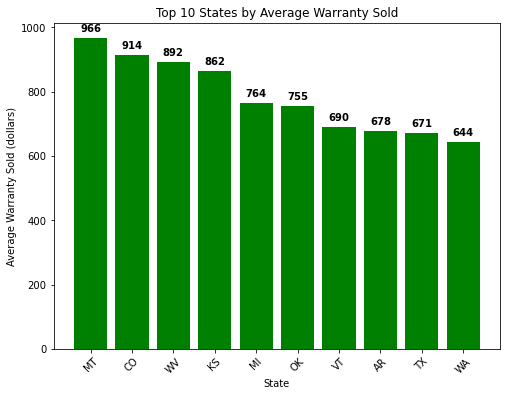

In [55]:
# Creating a barchart for the top 10 states for average warranty sold.

plt.figure(figsize=(8, 6))

plt.bar(df_combined_sorted['Property State'].head(10), df_combined_sorted['Average_Warranty_Sold'].head(10), color='green')
for i, value in enumerate(df_combined_sorted['Average_Warranty_Sold'].head(10)):
    plt.text(i, value+20, str(round(value)), ha='center', fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 States by Average Warranty Sold")
plt.xlabel("State")
plt.ylabel("Average Warranty Sold (dollars)")

plt.show()


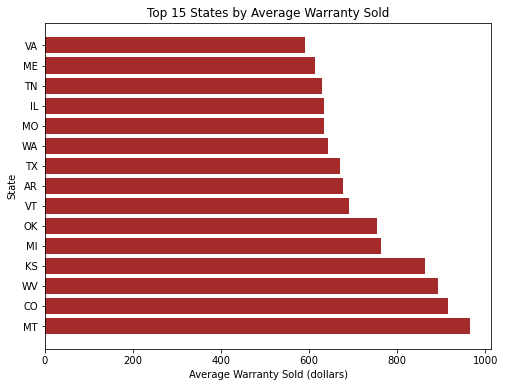

In [56]:
# Creating a horizontal barchart to show top 15 states by average warrnty price sold. 

df_combined_sorted = df_combined.sort_values(by='Average_Warranty_Sold', ascending=False)
top_states = df_combined_sorted.head(15)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_states['Property State'], top_states['Average_Warranty_Sold'], color='brown')
ax.set_xlabel('Average Warranty Sold (dollars)')
ax.set_ylabel('State')
ax.set_title('Top 15 States by Average Warranty Sold')

plt.show()


C:\Users\mdyoung\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


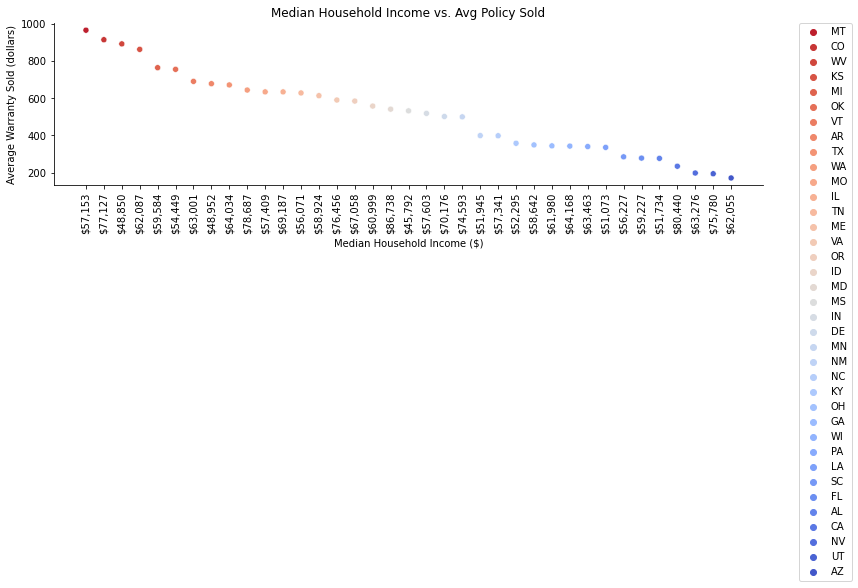

In [57]:
# Creating a scatterplot for Medium Household Income vs Average Warranty Sold using the seaborn package.

import seaborn as sns

plt.figure(figsize=(12,6))
palette = sns.color_palette("coolwarm_r", df_combined_sorted.shape[0])
sns.scatterplot(data=df_combined_sorted, x="2019 Median Household Income", y="Average_Warranty_Sold", hue="Property State", palette=palette)
plt.xlabel("Median Household Income ($)")
plt.xticks(rotation=90)
plt.ylabel("Average Warranty Sold (dollars)")
plt.title("Median Household Income vs. Avg Policy Sold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()


plt.show()

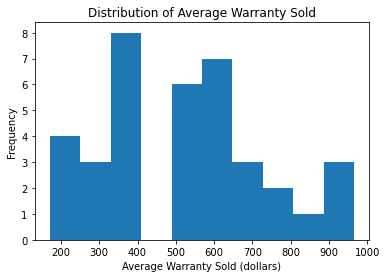

In [58]:
# Creating a histogram with 10 bins showing distribution of average warranty price sold. 

plt.hist(df_combined['Average_Warranty_Sold'], bins=10)
plt.xlabel("Average Warranty Sold (dollars)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Warranty Sold")
plt.show()


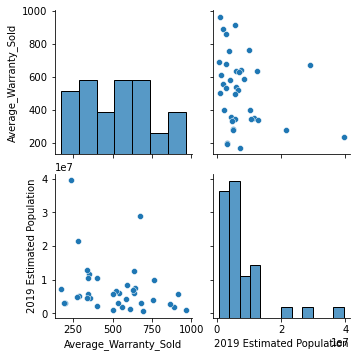

In [59]:
# Creating a pairplot to visualize the relationships among the variables.

sns.pairplot(df_combined_sorted)

In [60]:
df_combined2_sorted = df_combined.sort_values(by='2019 Median Household Income', ascending=False)
df_combined2_sorted.head(15)

,Property State,Average_Warranty_Sold,2019 Median Household Income,2019 Estimated Population
14,MD,541.063295,"$86,738",6045680
3,CA,234.175305,"$80,440",39512223
34,WA,643.792154,"$78,687",7614893
4,CO,914.339390,"$77,127",5758736
32,VA,590.141554,"$76,456",8535519
31,UT,193.796503,"$75,780",3205958
17,MN,499.646462,"$74,593",5639632
5,DE,501.479561,"$70,176",973764
9,IL,633.918571,"$69,187",12671821
26,OR,584.500000,"$67,058",4217737


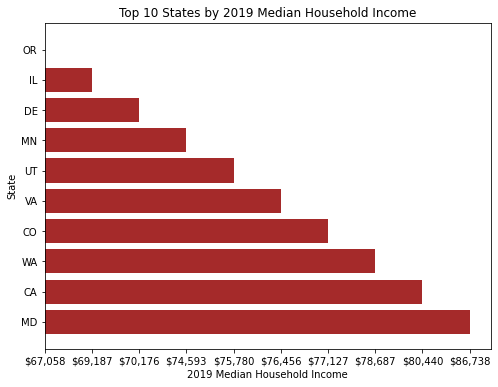

In [61]:
# Creating a horizontal barchart to show top 10 states of 2019 Median Household Income.

df_combined2_sorted = df_combined.sort_values(by='2019 Median Household Income', ascending=False)
top_states = df_combined2_sorted.head(10)[::-1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_states['Property State'], top_states['2019 Median Household Income'], color='brown')
ax.set_xlabel('2019 Median Household Income')
ax.set_ylabel('State')
ax.invert_yaxis()
ax.set_title('Top 10 States by 2019 Median Household Income')

plt.show()

In [62]:
conn.close()

During the analysis, several valuable insights were gained concerning the concentration of income in different regions of the United States. The study revealed that income concentration is particularly high in the northeastern and western regions of the continental United States. Based on the examination of the average policy price sold and median household incomes, it was concluded that Colorado, Washington, and California are the regions that should be the focus of our campaigns.  In addition, it is noted that the household income for homeowners is $65,000 (top 10 states over this mark). However, since there is no regional sales manager in that region, it is suggested that someone with a pre-existing book be hired to begin the efforts immediately.

To ensure consistency and a unique identifier across all datasets, state abbreviations were added to the API file, completing it with Milestone 5. Additionally, several other datasets can be incorporated to refine the analysis further. BLS data concerning the number of building permits being pulled by city and state can be used to narrow down the focus after identifying the states, while geological data concerning soil degradation can be used to avoid areas with high sinkhole activity.

The study uncovered ethical implications related to the income disparities across different regions of the country. The analysis indicated a significant difference in median household income between the top 10 states and the rest of the United States, implying a high level of economic disparity among different regions of the country. Income inequality is a growing concern in the United States, and this study emphasizes the importance of addressing this issue. 